In [1]:
from mmengine import Config
cfg = Config.fromfile('../work_dirs/mask2former_eva02_tiny_nwpu/mask2former_eva02_tiny_nwpu.py')

/nfs/home/3002_hehui/.conda/envs/XMX/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
# Choose to use a config and initialize the detector
config_file = '../work_dirs/mask2former_eva02_tiny_nwpu/mask2former_eva02_tiny_nwpu.py'
# Setup a checkpoint file to load
checkpoint_file = '../work_dirs/mask2former_eva02_tiny_nwpu/best_coco_bbox_mAP_epoch_255.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(cfg, checkpoint_file, device='cuda:0')  # or device='cuda:0'


Loads checkpoint by local backend from path: ../work_dirs/mask2former_eva02_tiny_nwpu/best_coco_bbox_mAP_epoch_255.pth
The model and loaded state dict do not match exactly

size mismatch for backbone.layers.0.attn.rope.freqs_cos: copying a param with shape torch.Size([5568, 64]) from checkpoint, the shape in current model is torch.Size([5476, 64]).
size mismatch for backbone.layers.0.attn.rope.freqs_sin: copying a param with shape torch.Size([5568, 64]) from checkpoint, the shape in current model is torch.Size([5476, 64]).
size mismatch for backbone.layers.1.attn.rope.freqs_cos: copying a param with shape torch.Size([5568, 64]) from checkpoint, the shape in current model is torch.Size([5476, 64]).
size mismatch for backbone.layers.1.attn.rope.freqs_sin: copying a param with shape torch.Size([5568, 64]) from checkpoint, the shape in current model is torch.Size([5476, 64]).
size mismatch for backbone.layers.2.attn.rope.freqs_cos: copying a param with shape torch.Size([5568, 64]) from che

In [3]:
# Use the detector to do inference
image = mmcv.imread('../data/NWPU/NWPU VHR-10 dataset/positive image set/192.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    scale_factor: (1.1744493392070485, 1.173841059602649)
    img_path: None
    img_id: 0
    batch_input_shape: (736, 1344)
    pad_shape: (736, 1344)
    ori_shape: (604, 1135)
    img_shape: (709, 1333)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            masks: BitmapMasks(num_masks=0, height=604, width=1135)
        ) at 0x7fc86c82f4f0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[  88.,  219.,  211.,  397.],
                        [  88.,  219.,  211.,  397.],
                        [  88.,  219.,  211.,  397.],
                        [  88.,  221.,  212.,  397.],
                        [  87.,  220.,  213.,  398.],
                        

/nfs/home/3002_hehui/.conda/envs/XMX/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/nfs/home/3002_hehui/.conda/envs/XMX/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/nfs/home/3002_hehui/.conda/envs/XMX/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.WandbVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


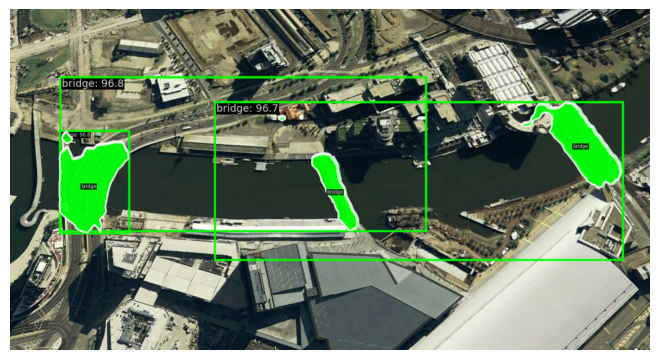

In [5]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()